In [ ]:
## This notebook shows the data structure of our whiten template HDF file

In [4]:
#H5_FILE="white_h_4096_dm2.h5"   # lower sampling rate ~ 64 MB, the 'dm' is the interval of mass in building the template bank  
#H5_FILE="white_h_8192_dm1.h5"   # <-- This one is what in Huerta's paper, which ~500 MB
H5_FILE="white_h_8192_dm2.h5"    # ~ 125 MB

In [19]:
###
### See what we have in this file
###

import h5py as h5
f = h5.File(H5_FILE,'r')

print ("======= HDF Attributes:")
#  1) merger_idx (ignore this) 
#  2) sampling rate 
print (f.attrs.items())

print ("======= HDF arrays:")
print (f.attrs.items())
for i in f.items():
    print (i)
# we have training/validation/test dataset, each set contain two polarization of GW, and also the binary mass
   
f.close()


======= HDF Attributes:
[(u'merger_idx', 0), (u'srate', 8192)]
======= HDF arrays:
[(u'merger_idx', 0), (u'srate', 8192)]
(u'test_hc', <HDF5 dataset "test_hc": shape (654, 8192), type "<f4">)
(u'test_hp', <HDF5 dataset "test_hp": shape (654, 8192), type "<f4">)
(u'test_m1', <HDF5 dataset "test_m1": shape (654,), type "<f4">)
(u'test_m2', <HDF5 dataset "test_m2": shape (654,), type "<f4">)
(u'train_hc', <HDF5 dataset "train_hc": shape (685, 8192), type "<f4">)
(u'train_hp', <HDF5 dataset "train_hp": shape (685, 8192), type "<f4">)
(u'train_m1', <HDF5 dataset "train_m1": shape (685,), type "<f4">)
(u'train_m2', <HDF5 dataset "train_m2": shape (685,), type "<f4">)
(u'val_hc', <HDF5 dataset "val_hc": shape (658, 8192), type "<f4">)
(u'val_hp', <HDF5 dataset "val_hp": shape (658, 8192), type "<f4">)
(u'val_m1', <HDF5 dataset "val_m1": shape (658,), type "<f4">)
(u'val_m2', <HDF5 dataset "val_m2": shape (658,), type "<f4">)


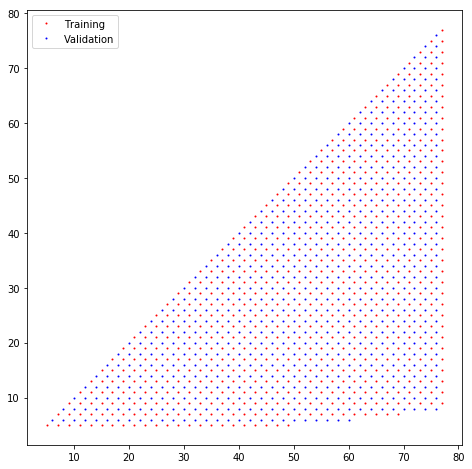

('# of whiten waveform for each set: ', 685)


In [20]:
### Now, visualize the dataset 
import h5py as h5
import matplotlib.pyplot as plt
%matplotlib inline

f = h5.File(H5_FILE,'r')
m1t = f['train_m1']
m2t = f['train_m2']
m1v = f['val_m1']
m2v = f['val_m2']

plt.figure(figsize=(8,8))
plt.plot(m2t, m1t, 'r.', markersize=2, label="Training")
plt.plot(m2v, m1v, 'b.', markersize=2, label="Validation")
plt.axes().set_aspect('equal')
plt.legend()
plt.show()

print ("# of whiten waveform for each set: ", len(f['train_hp']))

f.close()